# Visualisation

## Principal component analysis

         PC1        PC2     Category
0  -0.504663   2.608573  T-shirt/top
1 -18.182703   0.285265     Trousers
2   5.345144  -2.348569  T-shirt/top
3 -11.084712   1.340172        Dress
4  -1.613810  10.749582        Shirt


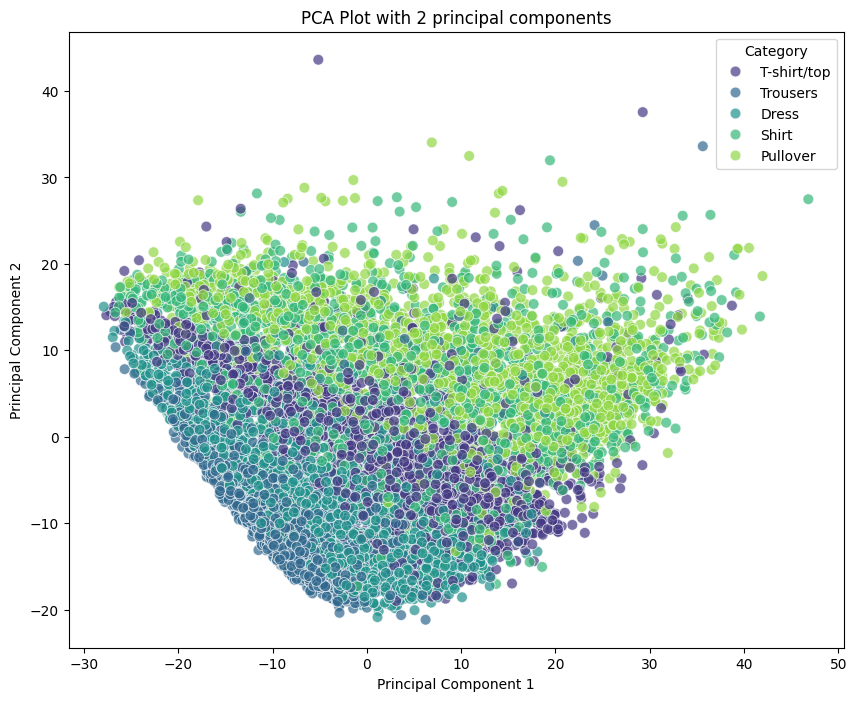

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Loading the fashion MNIST test data
test_data = np.load('fashion_test.npy')

# Extract features (pixel values) and labels
#Traning
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
# Test
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Apply PCA to the standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first two principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Category'] = y_train_strings

print(pc_df.head())

# Visualize the PCA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Category', data=pc_df, palette='viridis', s=60, alpha=0.7)
plt.title('PCA Plot with 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.show()


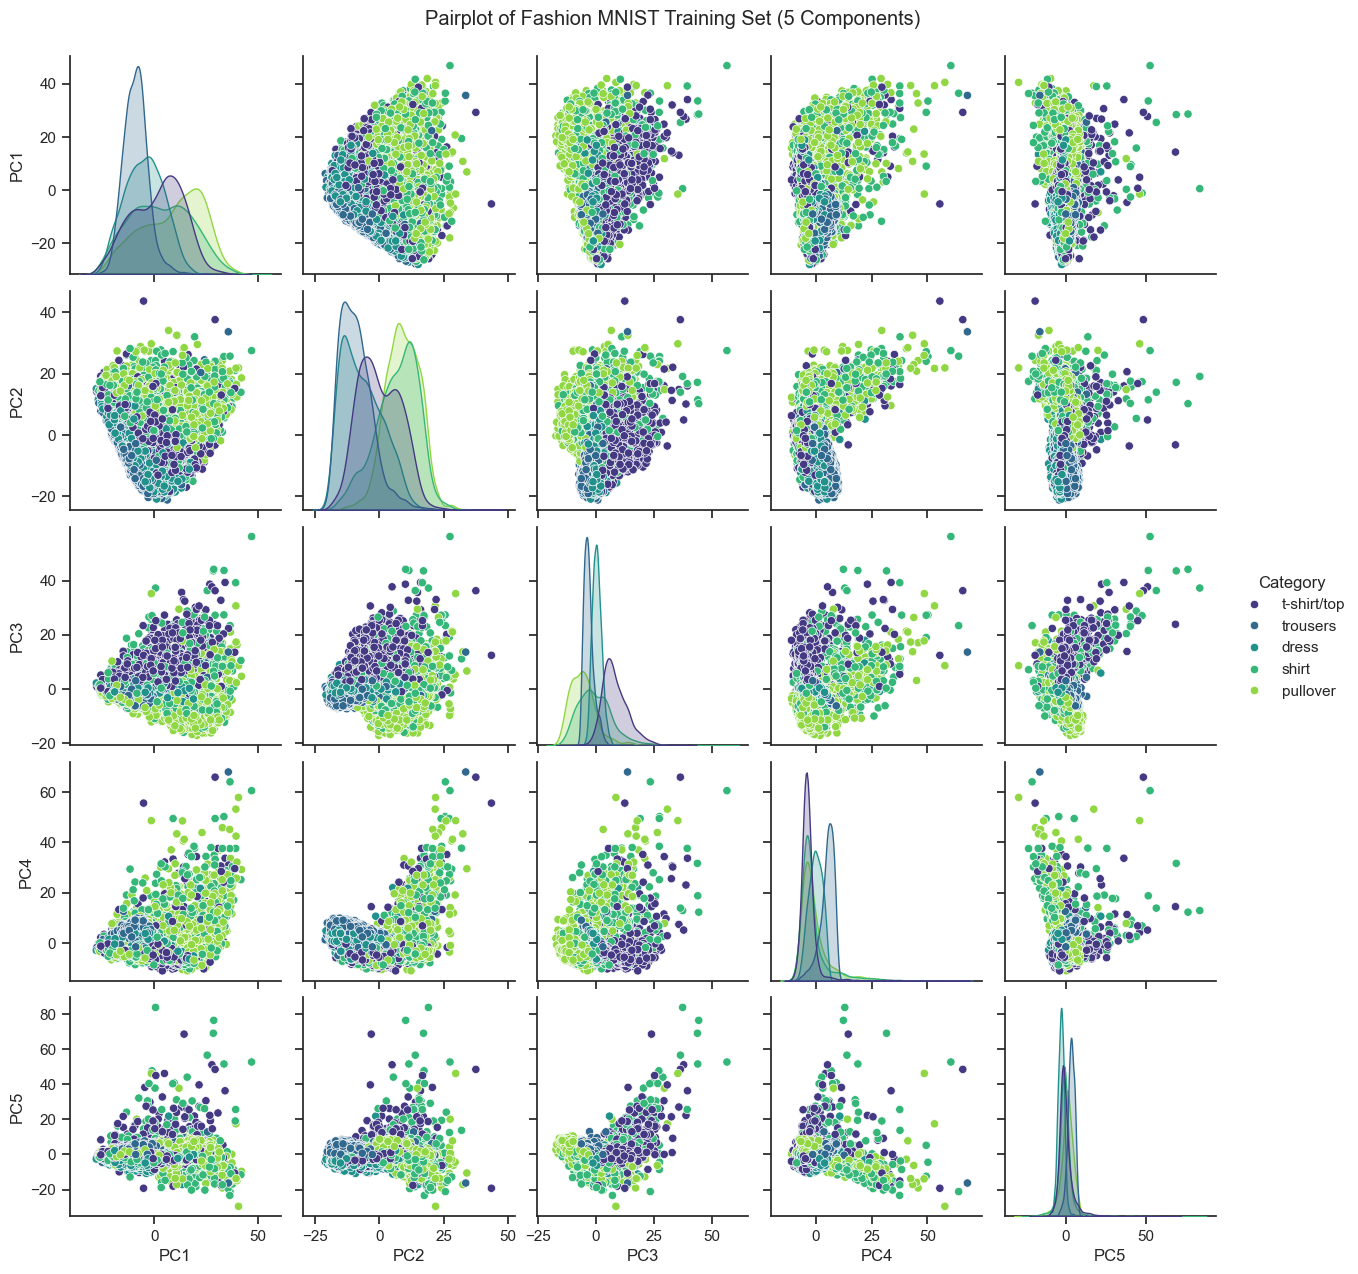

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "t-shirt/top", 1: "trousers", 2: "pullover", 3: "dress", 4: "shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Apply PCA to the standardized data with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first five principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df['Category'] = y_train_strings

# Visualize the pairplot using Seaborn
sns.set(style="ticks", color_codes=True)
sns.pairplot(pc_df, hue='Category', palette='viridis', markers='o', diag_kind='kde')
plt.suptitle('Pairplot of Fashion MNIST Training Set (5 Components)', y=1.02)
plt.show()


## Linear Discriminant Analysis

/var/folders/lh/g378mnz9751fhr55c2hz6bnh0000gn/T/ipykernel_4272/309501566.py:44: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))


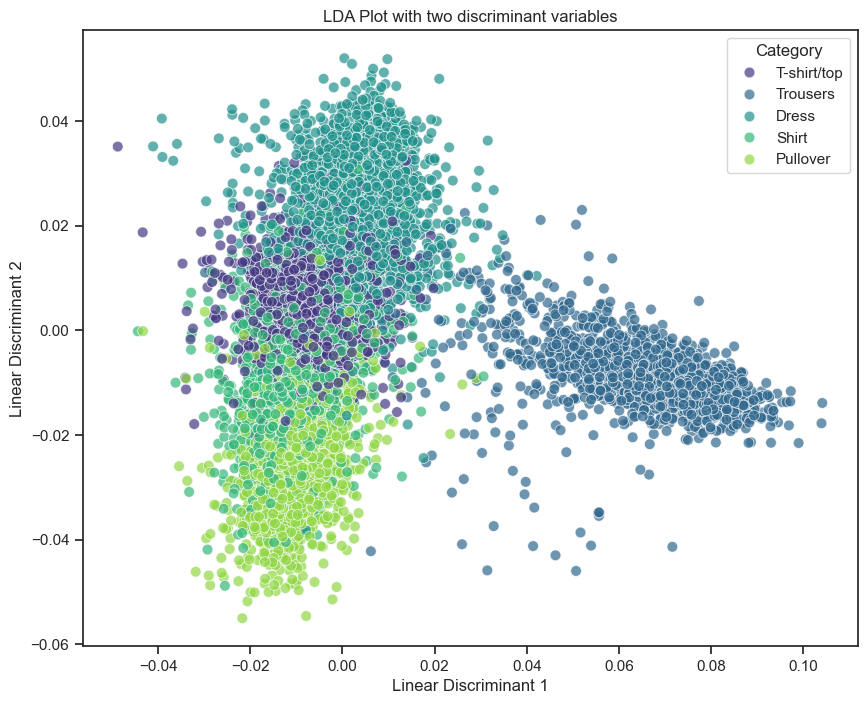

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def lda(X, y, num_components=2):
    """
    Linear Discriminant Analysis (LDA) implementation.

    Parameters:
    - X: Feature matrix (n_samples, n_features)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to keep

    Returns:
    - lda_components: Linear discriminant components (n_features, num_components)
    - explained_variance: Explained variance by each linear discriminant component
    """

    classes = np.unique(y)
    num_classes = len(classes)
    num_features = X.shape[1]

    # Compute class means
    class_means = np.array([np.mean(X[y == c], axis=0) for c in classes])

    # Compute overall mean
    overall_mean = np.mean(X, axis=0)

    # Compute between-class scatter matrix
    between_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        n = len(y[y == c])
        mean_diff = class_means[c] - overall_mean
        between_class_scatter += n * np.outer(mean_diff, mean_diff)

    # Compute within-class scatter matrix
    within_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        class_data = X[y == c]
        mean_diff = class_data - class_means[c]
        within_class_scatter += np.dot(mean_diff.T, mean_diff)

    # Solve the generalized eigenvalue problem for (S_w)^(-1) * S_b
    eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top num_components eigenvectors
    lda_components = eigenvectors[:, :num_components]

    # Compute explained variance
    explained_variance = eigenvalues[:num_components] / np.sum(eigenvalues)

    return lda_components, explained_variance

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Apply LDA to the data
lda_components, explained_variance = lda(X_train, y_train, num_components=2)

# Project the data onto the first two linear discriminant components
lda_projection = np.dot(X_train, lda_components)

# Create a DataFrame with the linear discriminant components and labels
lda_df = pd.DataFrame(data=lda_projection, columns=['LD1', 'LD2'])
lda_df['Category'] = y_train_strings

# Visualize the LDA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='Category', data=lda_df, palette='viridis', s=60, alpha=0.7)
plt.title('LDA Plot with two discriminant variables')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

# Classification

## Naive Bayes Classifier

## Convolutional Neural Network

### importing the relevant libaries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import to_categorical
import logging
logging.getLogger('tensorflow').disabled = True


# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Loading the fashion MNIST test data
test_data = np.load('fashion_test.npy')

# Extract features (pixel values) and labels
#Traning
x_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Test
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

x_train = x_train / 255.00
x_test = x_test / 255.00

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

Shape of Training Image Data: (10000, 28, 28, 1)
Shape of Training Class Data: (10000, 5)
Shape of Test Image Data: (5000, 28, 28, 1)
Shape of Test Class Data: (5000, 5)


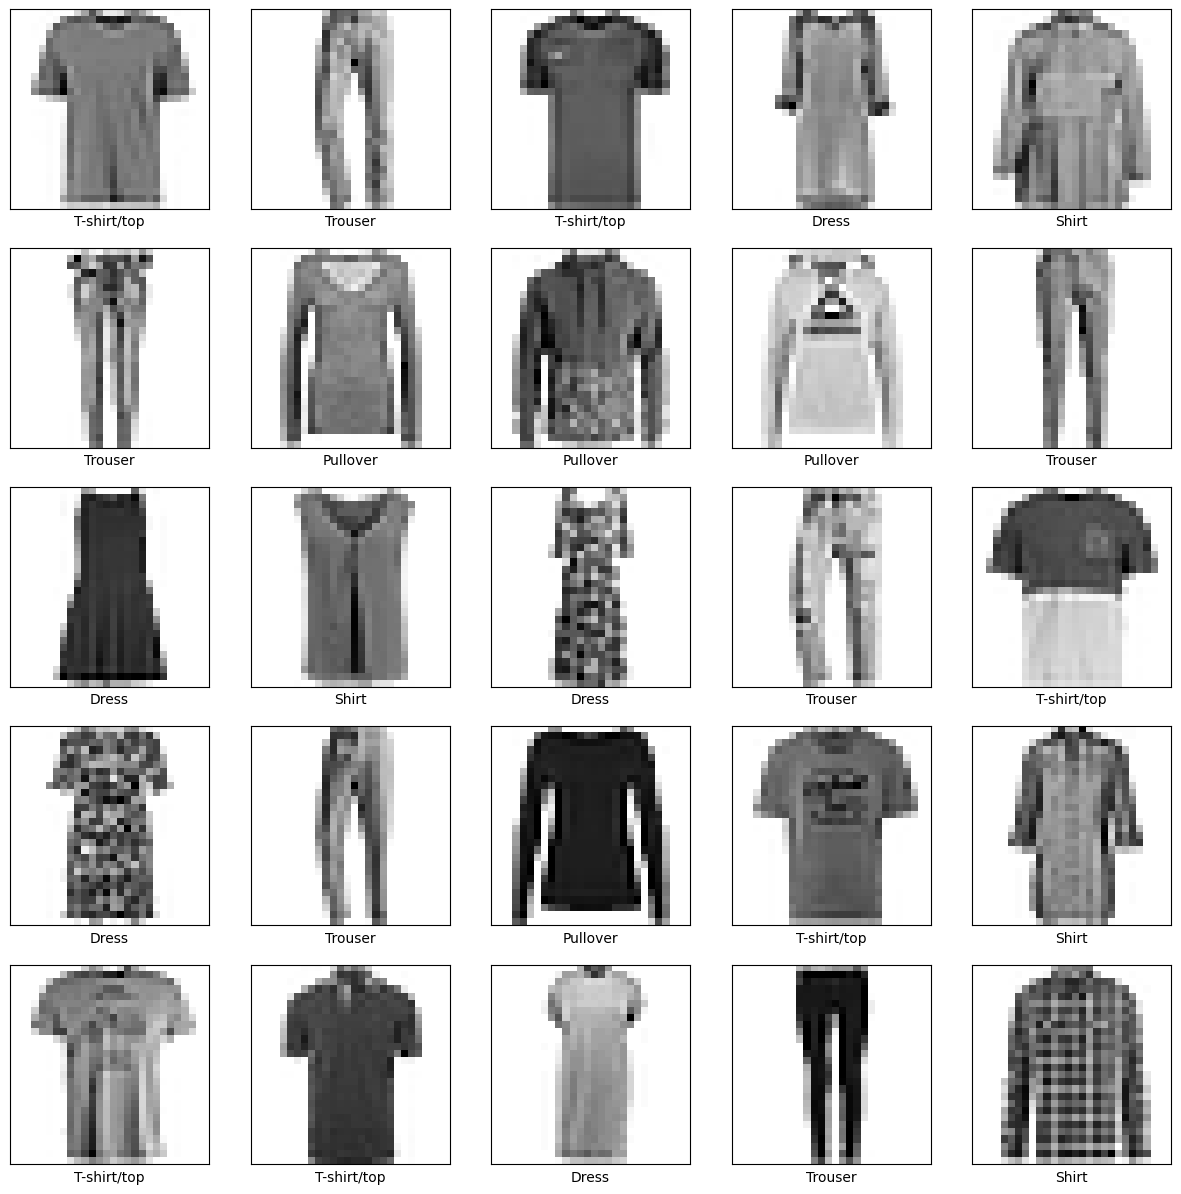

In [11]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
    # Convert one-hot encoded label back to integer
    class_index = np.argmax(y_train[i])
    
    plt.xlabel(class_names[class_index])

plt.show()


In [12]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# We start with a convolutional layer this will extract features from 
# the input images by sliding a convolution filter over the input image, 
# resulting in a feature map.
model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        activation='relu',
        input_shape=(28, 28, 1)
    )
) 

# The next layer we will add is a Maxpooling layer.
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    )
)
          
# We'll now add a dropout layer.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

# Output from the previous layer is a 3D tensor. This must be flattened to a 1D 
# vector before being fed to the Dense Layers.
model.add(
    tf.keras.layers.Flatten()
)

# A dense (interconnected) layer is added for mapping the derived features 
# to the required class.
model.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

# Final layer with 5 outputs and a softmax activation.
model.add(
    tf.keras.layers.Dense(
        units=5,
        activation='softmax'
    )
)

# Build the model
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Display a summary of the model's structure
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                      

In [13]:
# Add an empty color dimension as the Convolutional net is expecting this
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

# Train the CNN on the training data
history = model.fit(
    
      # Training data : features (images) and classes.
      x_train, y_train,
                    
      # number of samples to work through before updating the 
      # internal model parameters via back propagation.
      batch_size=300, 

      # An epoch is an iteration over the entire training data.
      epochs=80, 

      # The model will set apart his fraction of the training 
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of 
      # each epoch. 
      validation_data=(x_test, y_test), 

      verbose=1) 

Epoch 1/80
34/34 [==============================] - 2s 39ms/step - loss: 0.7389 - accuracy: 0.7217 - val_loss: 0.5315 - val_accuracy: 0.8032
Epoch 2/80
34/34 [==============================] - 1s 41ms/step - loss: 0.4504 - accuracy: 0.8344 - val_loss: 0.4447 - val_accuracy: 0.8382
Epoch 3/80
34/34 [==============================] - 1s 33ms/step - loss: 0.4021 - accuracy: 0.8484 - val_loss: 0.4210 - val_accuracy: 0.8492
Epoch 4/80
34/34 [==============================] - 1s 33ms/step - loss: 0.3815 - accuracy: 0.8568 - val_loss: 0.3997 - val_accuracy: 0.8548
Epoch 5/80
34/34 [==============================] - 1s 32ms/step - loss: 0.3413 - accuracy: 0.8728 - val_loss: 0.3770 - val_accuracy: 0.8650
Epoch 6/80
34/34 [==============================] - 1s 40ms/step - loss: 0.3229 - accuracy: 0.8805 - val_loss: 0.4001 - val_accuracy: 0.8560
Epoch 7/80
34/34 [==============================] - 1s 43ms/step - loss: 0.3138 - accuracy: 0.8817 - val_loss: 0.3737 - val_accuracy: 0.8594
Epoch 8/80
34

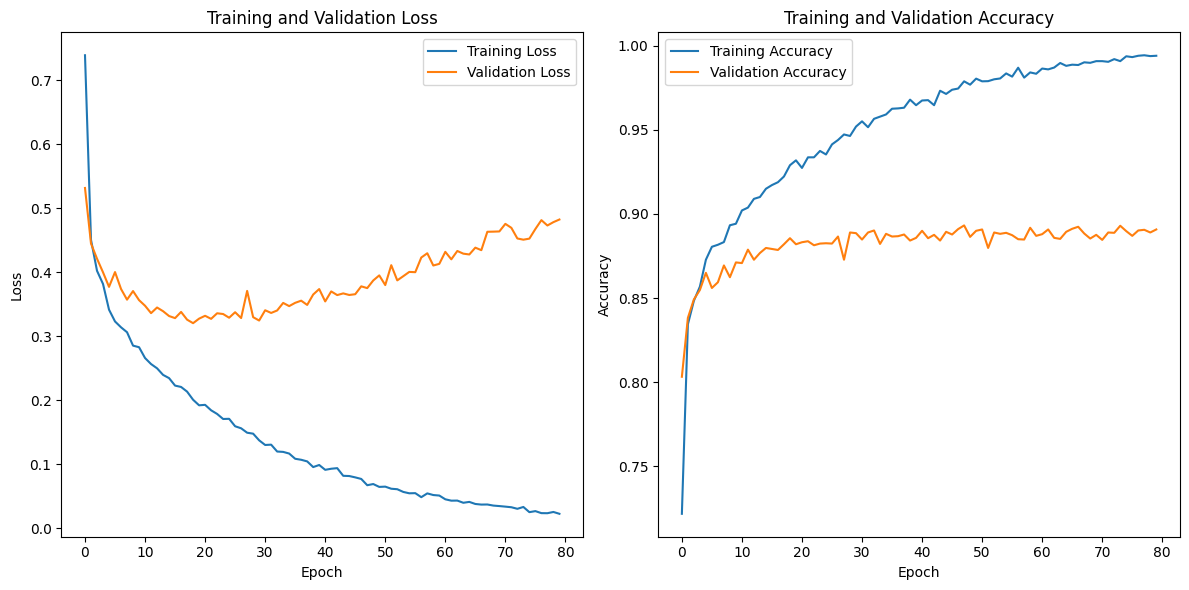

In [14]:
# Access the training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# Get Model Predictions for test data
predicted_probabilities = model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=class_names))


157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.77      0.83      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.92      0.85      0.88      1000
       Dress       0.92      0.93      0.92      1000
       Shirt       0.70      0.86      0.77      1000

    accuracy                           0.88      5000
   macro avg       0.89      0.88      0.88      5000
weighted avg       0.89      0.88      0.88      5000



## Third classifier